In [3]:
import pandas as pd         # data frame manipulations
import numpy as np          # numerical analysis
import seaborn as sns
import matplotlib.pyplot as plt   # data visualisation
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from jupyterthemes import jplot


In [4]:
creditcard_df= pd.read_csv('/Users/Anushruti/JupyterNotebook/marketing_data.csv')
creditcard_df


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
creditcard_df.info()   #gives additional insight into the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
print("mean, min, max =",creditcard_df['BALANCE'].mean(),creditcard_df['BALANCE'].min(),creditcard_df['BALANCE'].max())

mean, min, max = 1564.4748276781038 0.0 19043.13856


In [7]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
print(creditcard_df['ONEOFF_PURCHASES'].max())

40761.25


In [9]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES']==40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


<AxesSubplot:>

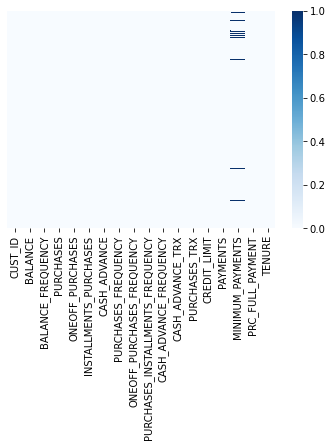

In [10]:
sns.heatmap(creditcard_df.isnull(),yticklabels=False,cbar=True, cmap='Blues')

In [11]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=creditcard_df['MINIMUM_PAYMENTS'].mean()

In [13]:
creditcard_df.isnull().sum()


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [14]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=creditcard_df['CREDIT_LIMIT'].mean()

In [15]:
creditcard_df.drop('CUST_ID',axis =1, inplace=True)

In [16]:
n= len(creditcard_df.columns)
n


17

<Figure size 720x3600 with 0 Axes>

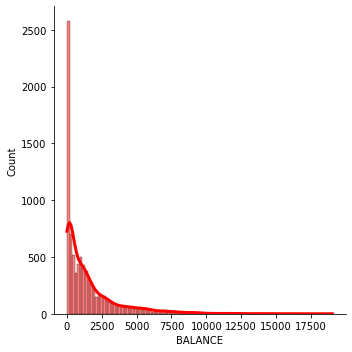

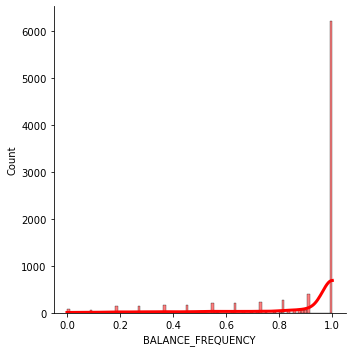

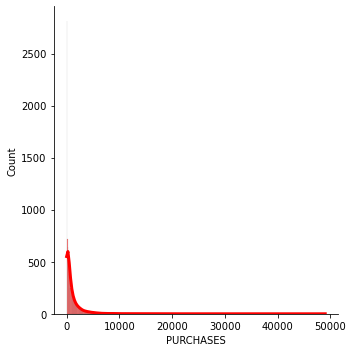

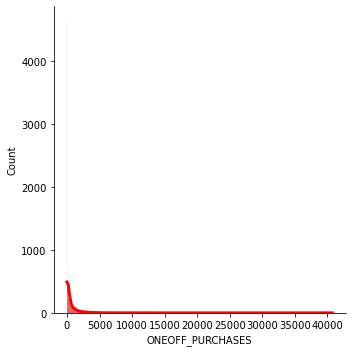

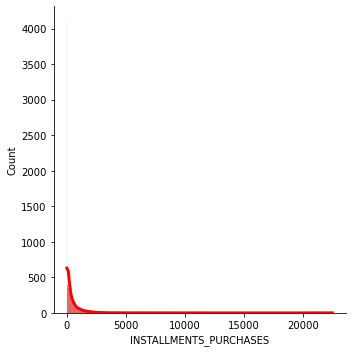

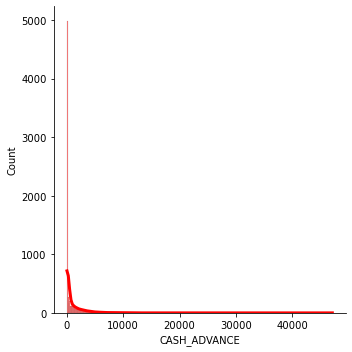

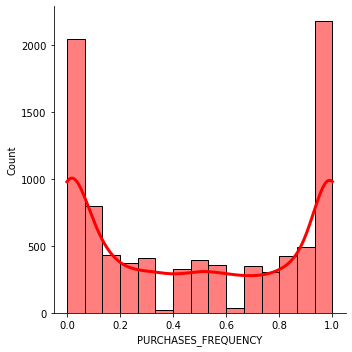

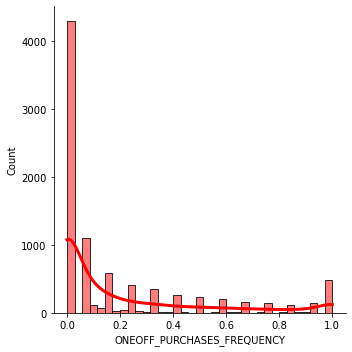

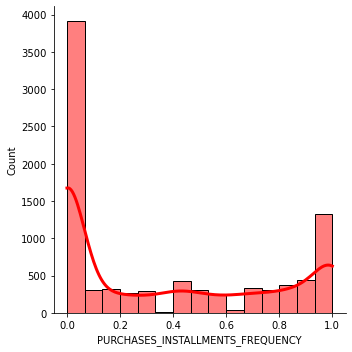

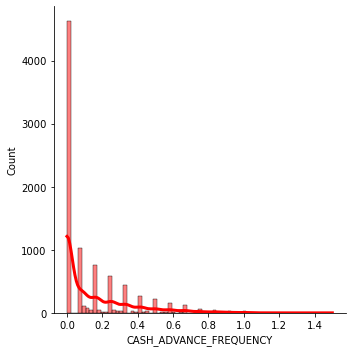

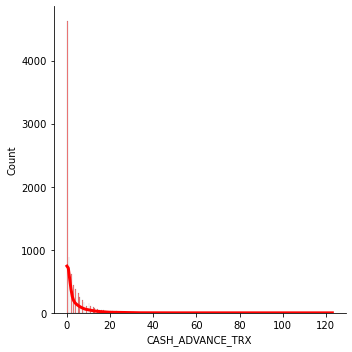

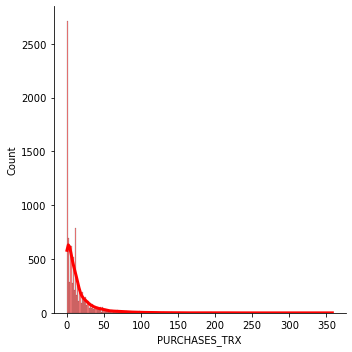

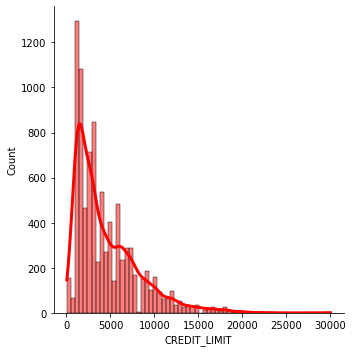

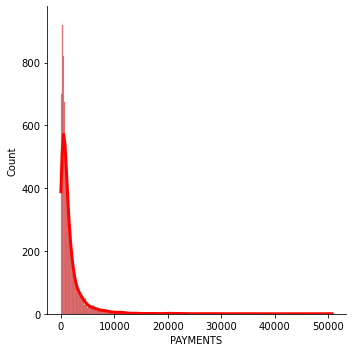

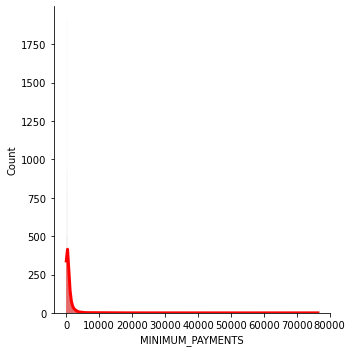

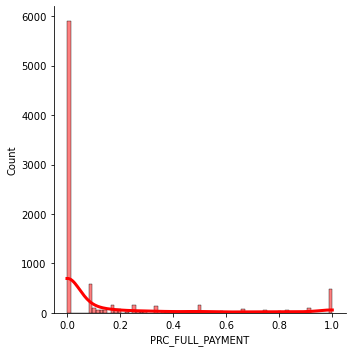

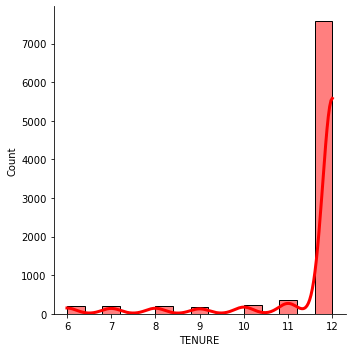

<Figure size 432x288 with 0 Axes>

In [64]:
#distribution plot- combination of matplot.hist funtion with seaborn kde(kernal density estimate-probability
# distribtuion values.) plot
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
    #plt.subplot(17,1,i+1)
    sns.displot(creditcard_df[creditcard_df.columns[i]],kde=True,color='red',line_kws={'lw': 3},kind='hist')
    plt.show()
    #plt.title(creditcard_df.columns[i])
plt.tight_layout()


In [18]:
correlations= creditcard_df.corr()


<AxesSubplot:>

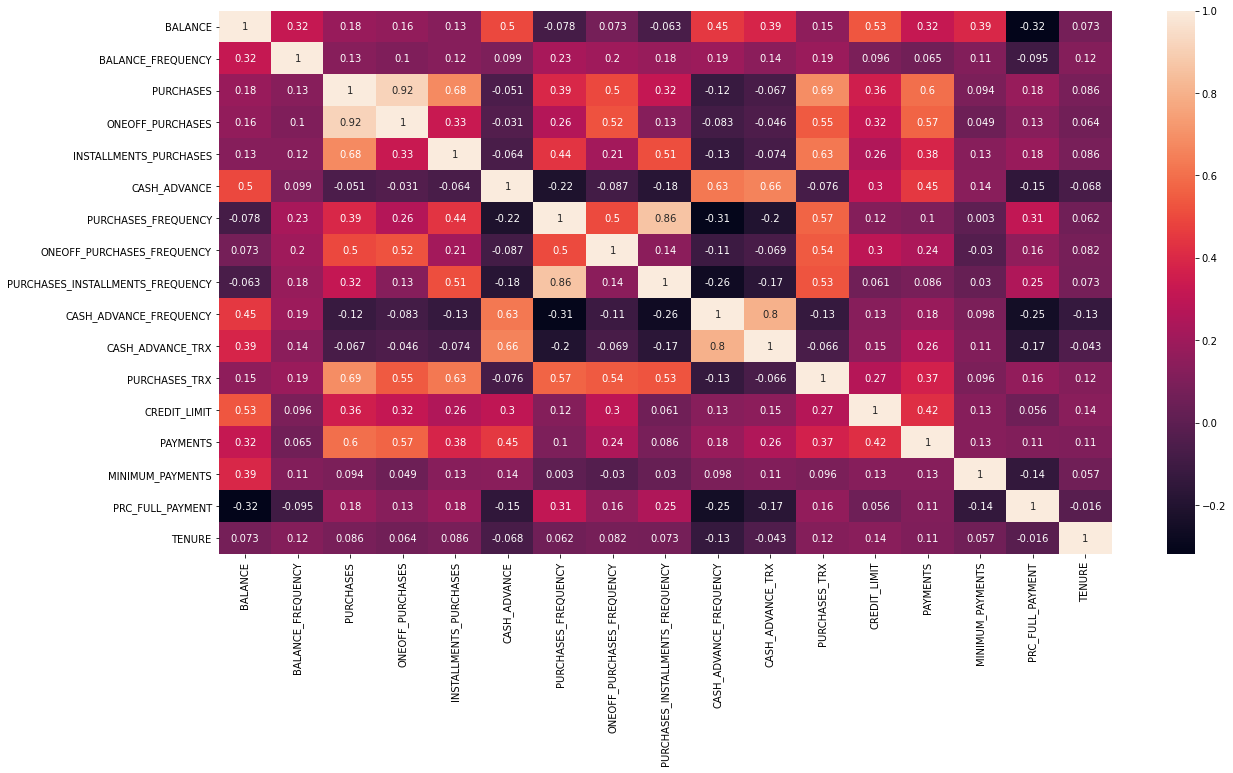

In [19]:
plt.subplots(figsize=(20,10))
sns.heatmap(correlations, annot=True)


In [20]:
#K-means clustering Algorithm:
# -> unsupervised
# -> calculate k using the elbow method

scaler = StandardScaler()
credit_scaled = scaler.fit_transform(creditcard_df)

In [21]:
credit_scaled.shape

(8950, 17)

In [22]:
credit_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

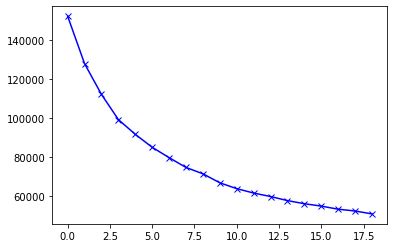

In [23]:
scores = []
rangev= range(1,20)
for i in rangev:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(credit_scaled)
    scores.append(kmeans.inertia_)
plt.plot(scores,'bx-')


In [24]:
kmeans = KMeans(7)
kmeans.fit(credit_scaled)
labels = kmeans.labels_ #clusters(labels) associated at each data point

In [25]:
kmeans.cluster_centers_.shape

(7, 17)

In [26]:
cluster_centers = pd.DataFrame(data= kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.368305,0.333280,-0.041530,-0.230780,0.325613,-0.366949,0.973262,-0.342487,1.160935,-0.476485,-0.362192,0.170542,-0.275293,-0.223729,-0.031402,0.293240,0.254703
1,0.145954,0.432553,0.978132,0.924619,0.614066,-0.306253,1.102650,1.879984,0.552183,-0.405210,-0.315184,1.233252,0.724423,0.415184,-0.029566,0.470387,0.307135
2,0.009383,0.401374,-0.343102,-0.222870,-0.401698,-0.101730,-0.814482,-0.333805,-0.759221,0.088991,-0.037908,-0.465446,-0.299912,-0.245777,-0.015007,-0.451522,0.272475
3,1.488505,0.403475,7.413638,6.553369,5.486972,0.028557,1.072872,1.875094,1.028264,-0.309559,-0.107750,4.914457,2.259343,5.133194,0.782295,0.828775,0.330386
4,1.676448,0.394844,-0.196266,-0.147445,-0.193282,1.997830,-0.447815,-0.185323,-0.396913,1.910432,1.926691,-0.233923,1.014173,0.838548,0.591191,-0.391335,0.068171
5,-0.336090,-0.346701,-0.284230,-0.209208,-0.287346,0.064694,-0.196404,-0.273217,-0.228349,0.302558,-0.002968,-0.385403,-0.557539,-0.390658,-0.209560,0.017471,-3.192867
6,-0.701871,-2.130863,-0.305698,-0.228974,-0.302038,-0.323440,-0.545001,-0.425062,-0.441065,-0.522635,-0.377066,-0.415522,-0.172761,-0.201157,-0.257660,0.301082,0.201184


In [27]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data= cluster_centers, columns = [creditcard_df.columns])
cluster_centers


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,797.879304,0.956222,914.474732,209.389788,705.515856,209.362751,0.880967,0.100287,0.825823,0.039795,0.777135,18.948866,3492.822095,1085.469526,791.024407,0.239482,11.858177
1,1868.265433,0.979738,3092.998662,2127.116115,966.360255,336.644664,0.932897,0.763293,0.583889,0.054057,1.097930,45.363854,7130.196873,2935.060977,795.305143,0.291295,11.928344
2,1584.004879,0.972353,270.161089,222.518245,47.817220,765.539366,0.163460,0.102877,0.062704,0.152952,2.990134,3.140592,3403.247592,1021.644679,829.234107,0.021652,11.881959
3,4662.671853,0.972850,16842.556892,11469.688108,5372.868784,1038.757441,0.920946,0.761835,0.773096,0.073198,2.513514,136.864865,12714.864865,16593.236130,2687.311037,0.396117,11.959459
4,5053.860126,0.970806,583.880236,347.709348,236.285253,5168.412968,0.310621,0.147172,0.206694,0.517441,16.397075,8.895388,8184.425810,4160.658322,2241.953121,0.039256,11.608549
5,864.932877,0.795140,395.943444,245.195746,151.223889,1114.536873,0.411524,0.120952,0.273685,0.195689,3.228571,5.130159,2465.895952,602.226195,375.836775,0.158825,7.244444
6,103.589577,0.372489,350.076084,212.387370,137.938126,300.601383,0.271615,0.075654,0.189147,0.030560,0.675630,4.381513,3865.873483,1150.813224,263.740163,0.241776,11.786555


In [28]:
labels.shape

(8950,)

In [29]:
labels

array([2, 4, 1, ..., 5, 5, 5], dtype=int32)

In [30]:
ykmeans = kmeans.fit_predict(credit_scaled)
ykmeans


array([0, 5, 1, ..., 3, 3, 3], dtype=int32)

In [31]:
#concatenate the clusters to the original dataframe
credit_cluster = pd.concat([creditcard_df,pd.DataFrame({'Clusters': labels})],axis=1 )

In [32]:
credit_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [33]:
#Principal Component Analysis
#Dimensionlity reduction technique

#Obtain Principal components
pca= PCA(n_components= 2)
pca1= pca.fit_transform(credit_scaled)
pca1

array([[-1.68222019, -1.07645148],
       [-1.13829409,  2.50647621],
       [ 0.96968587, -0.38351243],
       ...,
       [-0.92620422, -1.81078782],
       [-2.33655288, -0.65796983],
       [-0.55642219, -0.40046433]])

In [34]:
#Create Dataframe with components:

pctable = pd.DataFrame(data= pca1, columns=['pca1','pca2'])
pctable.head()

,pca1,pca2
0,-1.682220,-1.076451
1,-1.138294,2.506476
2,0.969686,-0.383512
3,-0.873627,0.043165
4,-1.599434,-0.688582


In [35]:
#concatenate clusters to pctable
pc_cluster= pd.concat([pctable, pd.DataFrame({'Clusters':labels})],axis=1)
pc_cluster.head()

,pca1,pca2,Clusters
0,-1.682220,-1.076451,2
1,-1.138294,2.506476,4
2,0.969686,-0.383512,1
3,-0.873627,0.043165,2
4,-1.599434,-0.688582,2


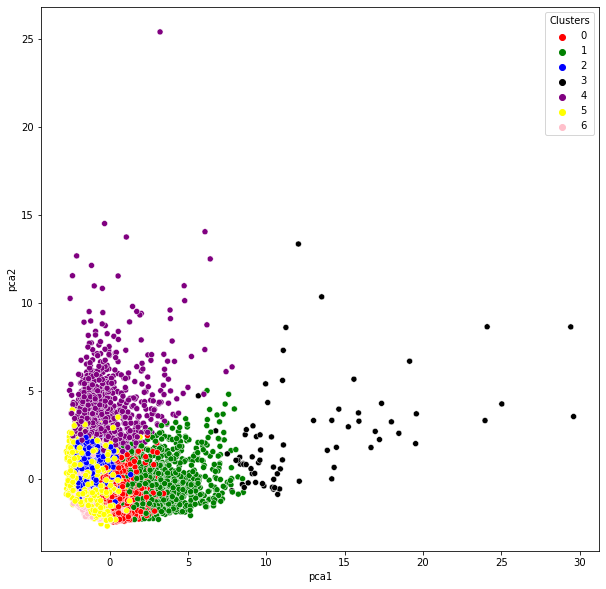

In [36]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1",y="pca2",hue="Clusters",data= pc_cluster,palette=['red','green','blue','black','purple','yellow','pink'])